## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Connect to the database
conn = sqlite3.connect('ZippedData/im.db')
cursor = conn.cursor()

In [3]:
# Read the movie gross data into a pandas dataframe
df = pd.read_csv('ZippedData/bom.movie_gross.csv.gz')

In [4]:
# Preview the data
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# Check the data types of each column
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [6]:
# Check for missing values in each column
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Remove rows with missing values in the 'studio' column
df = df.dropna(subset=['studio'])

In [9]:
# check the percentage of missing values in the "foreign_gross" column like this:
foreign_gross_missing = df['foreign_gross'].isnull().sum()
total_rows = df.shape[0]
percentage_missing = (foreign_gross_missing / total_rows) * 100
print(f"The percentage of missing values in the 'foreign_gross' column is: {percentage_missing:.2f}%")

The percentage of missing values in the 'foreign_gross' column is: 39.89%


In [10]:
# Fill missing values in the 'domestic_gross' column with the median value
median_domestic_gross = df['domestic_gross'].median()
df['domestic_gross'] = df['domestic_gross'].fillna(median_domestic_gross)

In [11]:
# Convert foreign_gross column to numeric datatype
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Fill missing values in the foreign_gross column with 0
df['foreign_gross'] = df['foreign_gross'].fillna(0)

# Create a new column called total_gross which is the sum of domestic_gross and foreign_gross columns
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
df


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [12]:
# Read the movie basics data from the database into a pandas dataframe
movie_basics_df = pd.read_sql('SELECT * FROM movie_basics', conn)

In [13]:
# Preview the data
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
# Read the movie ratings data from the database into a pandas dataframe
movie_ratings_df = pd.read_sql('SELECT * FROM movie_ratings', conn)

In [15]:
# Preview the data
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
# Check for missing values in each dataframe
print(df.isnull().sum())
print(movie_ratings_df.isnull().sum())
print(movie_basics_df.isnull().sum())


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [17]:
# Check for duplicate rows in each dataframe
print(movie_basics_df.duplicated().sum())
print(movie_ratings_df.duplicated().sum())

0
0


In [18]:
# Read the tmdb movies data into a pandas dataframe
tmdb_movies= pd.read_csv("ZippedData/tmdb.movies.csv.gz")

In [19]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
# Read the movie info data from a TSV file into a pandas dataframe
file_path = "ZippedData/rt.movie_info.tsv.gz"
movie_info_df = pd.read_csv(file_path, delimiter='\t', encoding='unicode_escape')


In [21]:
# Preview the data
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [22]:
# Check for missing values in each column
print(movie_info_df.isnull().sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [23]:
# Fill missing values with the mode (most common value) of the column
mode_rating = movie_info_df["rating"].mode()[0]
mode_genre = movie_info_df["genre"].mode()[0]
mode_runtime = movie_info_df["runtime"].mode()[0]


movie_info_df["rating"].fillna(mode_rating, inplace=True)
movie_info_df["genre"].fillna(mode_genre, inplace=True)
movie_info_df["runtime"].fillna(mode_runtime, inplace=True)

In [24]:
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [25]:
tmdb_movies_df = pd.read_csv("ZippedData/tmdb.movies.csv.gz")
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
print(tmdb_movies_df.isnull().sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [27]:
# Replace the file path with the actual file path on your system
file_path = "ZippedData/rt.movie_info.tsv.gz"

# Use read_csv to read the file as a DataFrame
movie_info_df = pd.read_csv(file_path, delimiter='\t', encoding='unicode_escape')

movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [28]:
#replace the missing values with a string that indicates the value is missing, such as "Unknown".

movie_info_df["director"].fillna("Unknown", inplace=True)
movie_info_df["writer"].fillna("Unknown", inplace=True)
movie_info_df["theater_date"].fillna("Unknown", inplace=True)
movie_info_df["dvd_date"].fillna("Unknown", inplace=True)
movie_info_df["currency"].fillna("Unknown", inplace=True)
movie_info_df["studio"].fillna("Unknown", inplace=True)


In [29]:
#Check percentage of missing values in box office
total_rows = len(movie_info_df)
missing_box_office = movie_info_df["box_office"].isnull().sum()
percent_missing_box_office = (missing_box_office / total_rows) * 100
print("Percentage of missing values in box_office column: {:.2f}%".format(percent_missing_box_office))

Percentage of missing values in box_office column: 78.21%


In [30]:
#Drop the box office column
movie_info_df.drop('box_office', axis=1, inplace=True)

In [31]:
#Preview the data
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",Unknown,104 minutes,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",Unknown,116 minutes,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",Unknown,128 minutes,Unknown
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unknown,Unknown,Unknown,200 minutes,Unknown


In [32]:
# Use read_csv to read the file as a DataFrame
reviews_df = pd.read_csv('ZippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')

In [33]:
#Preview the data
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [34]:
#Check for missing values in review_df
print(reviews_df.isnull().sum())

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


In [35]:
# Drop rows with missing 'review' values
reviews_df.dropna(subset=['review'], inplace=True)

# Convert 'rating' to float and impute missing values with median
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
rating_median = reviews_df['rating'].median()
reviews_df['rating'].fillna(rating_median, inplace=True)

# Drop rows with missing 'publisher' values
reviews_df.dropna(subset=['publisher'], inplace=True)

# Convert 'date' to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Check for missing values again
print(reviews_df.isnull().sum())

id               0
review           0
rating           0
fresh            0
critic        1898
top_critic       0
publisher        0
date             0
dtype: int64


In [36]:
#Drop the critic column
cleaned_reviews_df = reviews_df.dropna(subset=['critic'])


In [37]:
# Check for missing values again
print(cleaned_reviews_df.isnull().sum())

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64


In [38]:
cleaned_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,6.0,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,6.0,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,6.0,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,6.0,fresh,Daniel Kasman,0,MUBI,2017-11-16
5,3,... Cronenberg's Cosmopolis expresses somethin...,6.0,fresh,Michelle Orange,0,Capital New York,2017-09-11


In [39]:
# Read the movie gross data into a pandas dataframe
movie_budgets_df = pd.read_csv('ZippedData/tn.movie_budgets.csv.gz')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
#Check for duplicates
movie_budgets_df.duplicated().sum()

0

In [41]:
# Check for missing values
print(f"Number of missing values:\n{movie_budgets_df.isnull().sum()}")

Number of missing values:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [42]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)


In [43]:
#Calculate correlation between production budget and worldwide gross
correlation = movie_budgets_df['worldwide_gross'].corr(movie_budgets_df['production_budget'])
print(correlation)


0.7483059765694753


In [44]:
#A correlation of 0.7483059765694753 implies a strong positive correlation between the worldwide gross and the production budget. This means that as the production budget increases, there is a tendency for the worldwide gross to increase as well.

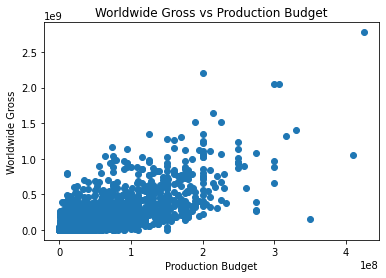

In [45]:
plt.scatter(movie_budgets_df['production_budget'], movie_budgets_df['worldwide_gross'])
plt.title('Worldwide Gross vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

Top 10 studios by total gross revenue:
          total_gross  title
studio                      
BV       4.421288e+10    106
Fox      3.100537e+10    136
WB       3.083595e+10    140
Uni.     2.975716e+10    147
Sony     2.240644e+10    110
Par.     1.954926e+10    101
WB (NL)  1.033470e+10     45
LGF      8.602983e+09    103
LG/S     5.431924e+09     41
P/DW     5.076500e+09     10


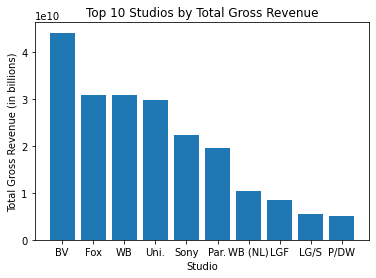

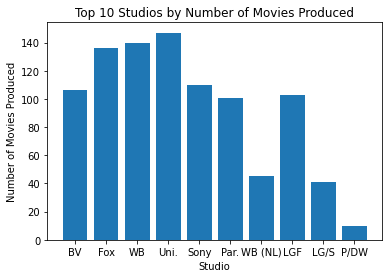

In [46]:
# Group the data by studio and compute statistics
studio_stats = df.groupby('studio').agg({'total_gross': 'sum', 'title': 'count'}).sort_values('total_gross', ascending=False)

# Print the top 10 studios by total gross revenue
print("Top 10 studios by total gross revenue:")
print(studio_stats.head(10))

# Plot a bar chart of the top 10 studios by total gross revenue
plt.bar(studio_stats.head(10).index, studio_stats.head(10)['total_gross'])
plt.title('Top 10 Studios by Total Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Total Gross Revenue (in billions)')
plt.show()

# Plot a bar chart of the top 10 studios by number of movies produced
plt.bar(studio_stats.head(10).index, studio_stats.head(10)['title'])
plt.title('Top 10 Studios by Number of Movies Produced')
plt.xlabel('Studio')
plt.ylabel('Number of Movies Produced')
plt.show()


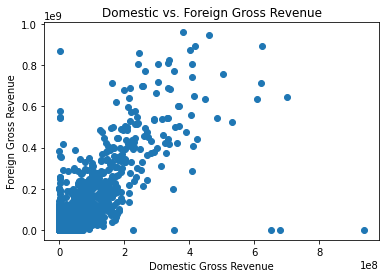

In [47]:
# Create a scatter plot of the domestic and foreign gross revenue for each movie
plt.scatter(df['domestic_gross'], df['foreign_gross'])

# Set the x-axis label
plt.xlabel('Domestic Gross Revenue')

# Set the y-axis label
plt.ylabel('Foreign Gross Revenue')

# Set the chart title
plt.title('Domestic vs. Foreign Gross Revenue')

# Show the chart
plt.show()


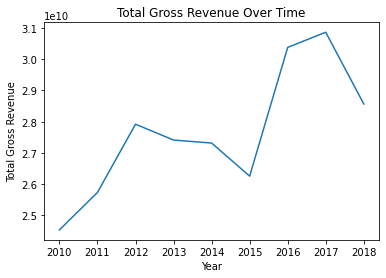

In [48]:
# Group the data by year and sum the total gross revenue
year_totals = df.groupby('year')['total_gross'].sum()

# Create a line graph of the total gross revenue over time
plt.plot(year_totals.index, year_totals.values)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Total Gross Revenue')

# Set the chart title
plt.title('Total Gross Revenue Over Time')

# Show the chart
plt.show()


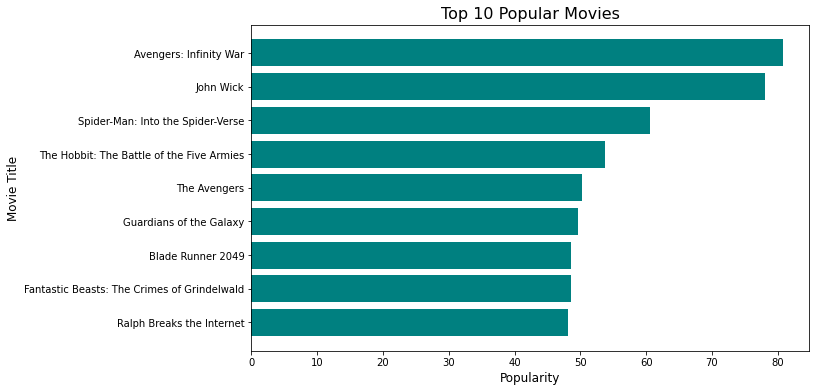

In [49]:
import matplotlib.pyplot as plt

# Sort the dataframe by popularity and get the top 10 movies
top_10_movies = tmdb_movies_df.sort_values(by='popularity', ascending=False)[:10]

# Get the movie titles and popularity values as lists
movie_titles = top_10_movies['original_title'].tolist()
popularity_values = top_10_movies['popularity'].tolist()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(movie_titles, popularity_values, color='teal')

# Add title and axis labels
ax.set_title('Top 10 Popular Movies', fontsize=16)
ax.set_xlabel('Popularity', fontsize=12)
ax.set_ylabel('Movie Title', fontsize=12)

# Invert the y-axis to show the most popular movies at the top
ax.invert_yaxis()

# Show the plot
plt.show()


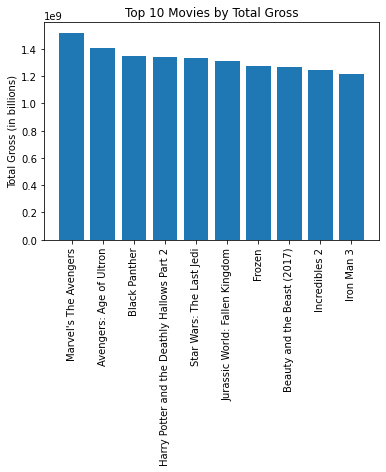

In [50]:
import matplotlib.pyplot as plt

# Sort the dataframe by total gross in descending order and get the top 10 rows
top10 = df.sort_values('total_gross', ascending=False).head(10)

# Create a bar graph of total gross
plt.bar(top10['title'], top10['total_gross'])
plt.xticks(rotation=90)
plt.ylabel('Total Gross (in billions)')
plt.title('Top 10 Movies by Total Gross')
plt.show()


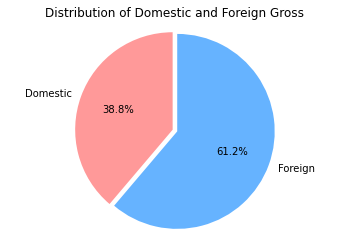

In [51]:
# Calculate the total domestic and foreign gross
total_domestic_gross = df['domestic_gross'].sum()
total_foreign_gross = df['foreign_gross'].sum()

# Create a pie chart of the distribution of domestic and foreign gross
labels = ['Domestic', 'Foreign']
sizes = [total_domestic_gross, total_foreign_gross]
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0)

plt.pie(sizes, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Domestic and Foreign Gross')
plt.axis('equal')
plt.show()


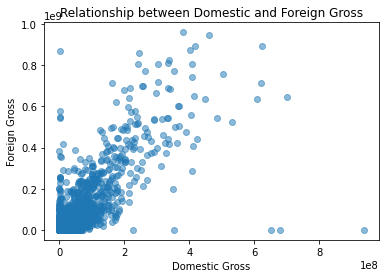

In [52]:
# Create a scatter plot of domestic and foreign gross
plt.scatter(df['domestic_gross'], df['foreign_gross'], alpha=0.5)
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Relationship between Domestic and Foreign Gross')
plt.show()


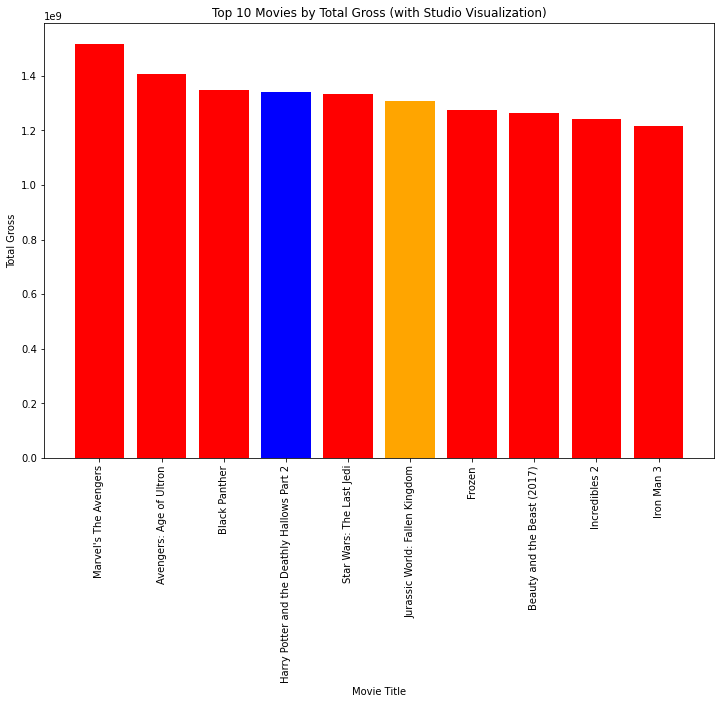

In [53]:

# get the top 10 movies by total gross
top_10_movies = df.sort_values(by='total_gross', ascending=False)[:10]

# create a dictionary of studios and their corresponding colors
studios = {'BV': 'red', 'WB': 'blue', 'P/DW': 'green', 'Uni.': 'orange', 'Sony': 'purple', 'Fox': 'pink', 'Par.': 'brown', 'LG/S': 'gray', 'WB (NL)': 'cyan', 'Sum.': 'magenta', 'LGF': 'yellow', 'STX': 'lime', 'MGM': 'olive', 'FoxS': 'teal', 'Wein.': 'navy', 'Mira.': 'maroon', 'Focus': 'khaki', 'Gold.': 'coral', 'UTV': 'orchid', 'GK': 'peru', 'CL': 'lavender', 'Rela.': 'salmon', 'Over.': 'skyblue', 'CBS': 'tan', 'Annapurna': 'plum', 'ENTMP': 'deeppink', 'MOMENTUM': 'violet', 'MNE': 'turquoise', 'Osci.': 'gold', 'W/Dim.': 'dodgerblue', 'Elev.': 'sienna', 'RAtt.': 'firebrick', 'Greenwich': 'limegreen', 'Imag.': 'darkslategray', 'Global Road': 'rosybrown', 'Electric': 'navajowhite', 'MUBI': 'mediumblue', 'Magn.': 'lightpink', 'CJ': 'peru', 'BST': 'darkkhaki', 'Cohen': 'lightgray', 'B360': 'lawngreen', 'CF': 'forestgreen', 'Anch.': 'indigo', 'Cleopatra': 'hotpink', 'Jan.': 'cadetblue', 'Roadside': 'crimson', 'App.': 'lightcoral', 'LG Premiere': 'mediumorchid', 'Aviron': 'darkturquoise', 'Neon': 'deeppink', 'Good Deed': 'mediumseagreen', 'Gaatri': 'indianred', 'U/P': 'slategray', 'Cinema': 'orangered', 'Relbig.': 'royalblue', 'Imax': 'mediumvioletred', 'ArtA': 'lightseagreen', 'EpicPics': 'sandybrown', 'PackYourBag': 'chocolate', 'EC': 'coral', 'Bleecker': 'navy', 'MBox': 'steelblue', 'Ampl.':'gray', 'NFC':'palegreen', 'Amazon':'darkslateblue', 'Affirm':'lightgreen', 'Blue Fox':'fuchsia'}

# create a bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_movies['title'], top_10_movies['total_gross'], color=[studios[x] for x in top_10_movies['studio']])
ax.set_xlabel('Movie Title')
ax.set_ylabel('Total Gross')
ax.set_title('Top 10 Movies by Total Gross (with Studio Visualization)')
plt.xticks(rotation=90)
plt.show()
